## Intro

- Re-run the same model as ref one with s&p 500 time seris data 

## Todo 

- Tune the LSTM model
- Train other time series data 
- Train LSTM with multiple features 

## Ref 

- https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/

In [13]:
import numpy as np
import numpy 
import pandas as pd 
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, classification_report
import matplotlib.pylab as plt
import datetime as dt
import time
import math 
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


# ML
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.recurrent import LSTM, GRU
from keras.layers import Convolution1D, MaxPooling1D
from keras.callbacks import Callback

In [18]:
# help function 


    

In [3]:
df = pd.read_csv('sp500.csv')

,1455.219971
0,1399.420044
1,1402.109985
2,1403.449951


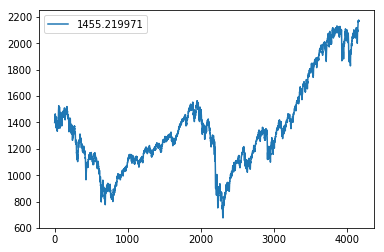

In [9]:
df.plot()

df.head(3)

In [8]:
dataset = df.values
dataset = dataset.astype('float32')

dataset

array([[1399.42],
       [1402.11],
       [1403.45],
       ...,
       [2170.06],
       [2173.6 ],
       [2170.84]], dtype=float32)

Epoch 1/20
 - 10s - loss: 0.0063
Epoch 2/20
 - 9s - loss: 1.2527e-04
Epoch 3/20
 - 8s - loss: 1.2266e-04
Epoch 4/20
 - 9s - loss: 1.1765e-04
Epoch 5/20
 - 9s - loss: 1.1357e-04
Epoch 6/20
 - 9s - loss: 1.1352e-04
Epoch 7/20
 - 8s - loss: 1.1248e-04
Epoch 8/20
 - 8s - loss: 1.1261e-04
Epoch 9/20
 - 12s - loss: 1.1364e-04
Epoch 10/20
 - 11s - loss: 1.1207e-04
Epoch 11/20
 - 11s - loss: 1.1156e-04
Epoch 12/20
 - 10s - loss: 1.1334e-04
Epoch 13/20
 - 8s - loss: 1.1258e-04
Epoch 14/20
 - 9s - loss: 1.1437e-04
Epoch 15/20
 - 8s - loss: 1.1128e-04
Epoch 16/20
 - 8s - loss: 1.1120e-04
Epoch 17/20
 - 8s - loss: 1.1129e-04
Epoch 18/20
 - 9s - loss: 1.1018e-04
Epoch 19/20
 - 8s - loss: 1.1213e-04
Epoch 20/20
 - 9s - loss: 1.1222e-04
Train Score: 0.01 RMSE
Test Score: 0.04 RMSE


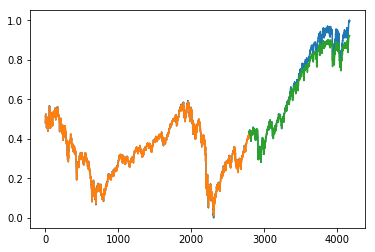

In [15]:
# -------- LSTM model 1 --------  #


# LSTM for international airline passengers problem with regression framing

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)

# --------
# load the dataset
#dataframe = read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
#dataset = dataframe.values
#dataset = dataset.astype('float32')
# --------


# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=20, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

Epoch 1/20
 - 10s - loss: 0.0067
Epoch 2/20
 - 12s - loss: 2.1723e-04
Epoch 3/20
 - 10s - loss: 1.8465e-04
Epoch 4/20
 - 9s - loss: 1.6954e-04
Epoch 5/20
 - 10s - loss: 1.5679e-04
Epoch 6/20
 - 9s - loss: 1.5106e-04
Epoch 7/20
 - 9s - loss: 1.4652e-04
Epoch 8/20
 - 9s - loss: 1.4248e-04
Epoch 9/20
 - 11s - loss: 1.4064e-04
Epoch 10/20
 - 11s - loss: 1.3378e-04
Epoch 11/20
 - 9s - loss: 1.3161e-04
Epoch 12/20
 - 9s - loss: 1.2717e-04
Epoch 13/20
 - 9s - loss: 1.3045e-04
Epoch 14/20
 - 9s - loss: 1.2802e-04
Epoch 15/20
 - 8s - loss: 1.2393e-04
Epoch 16/20
 - 9s - loss: 1.2613e-04
Epoch 17/20
 - 9s - loss: 1.2515e-04
Epoch 18/20
 - 11s - loss: 1.2288e-04
Epoch 19/20
 - 11s - loss: 1.2310e-04
Epoch 20/20
 - 10s - loss: 1.2297e-04
Train Score: 0.01 RMSE
Test Score: 0.04 RMSE


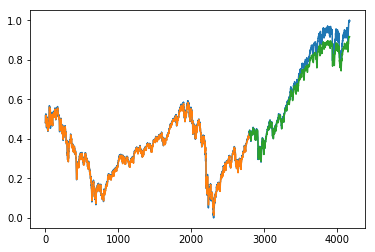

In [16]:
# -------- LSTM model 2  --------  #

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset



# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=20, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

Epoch 1/20
 - 15s - loss: 0.0030
Epoch 2/20
 - 13s - loss: 1.6181e-04
Epoch 3/20
 - 14s - loss: 1.6231e-04
Epoch 4/20
 - 13s - loss: 1.6142e-04
Epoch 5/20
 - 13s - loss: 1.5286e-04
Epoch 6/20
 - 13s - loss: 1.5133e-04
Epoch 7/20
 - 15s - loss: 1.4905e-04
Epoch 8/20
 - 13s - loss: 1.4749e-04
Epoch 9/20
 - 13s - loss: 1.4756e-04
Epoch 10/20
 - 14s - loss: 1.4208e-04
Epoch 11/20
 - 15s - loss: 1.3989e-04
Epoch 12/20
 - 16s - loss: 1.3565e-04
Epoch 13/20
 - 15s - loss: 1.3773e-04
Epoch 14/20
 - 16s - loss: 1.3322e-04
Epoch 15/20
 - 14s - loss: 1.2759e-04
Epoch 16/20
 - 13s - loss: 1.2768e-04
Epoch 17/20
 - 13s - loss: 1.2449e-04
Epoch 18/20
 - 12s - loss: 1.2097e-04
Epoch 19/20
 - 13s - loss: 1.2024e-04
Epoch 20/20
 - 14s - loss: 1.1995e-04
Train Score: 0.01 RMSE
Test Score: 0.02 RMSE


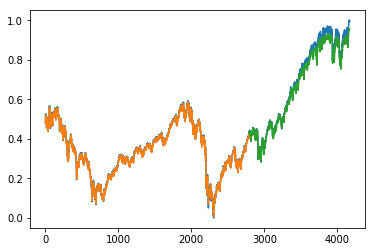

In [17]:
# -------- LSTM model 3  --------  #


# reshape input to be [samples, time steps, features]

trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))



# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset


# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=20, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

Epoch 1/1
 - 13s - loss: 0.0014
Epoch 1/1
 - 10s - loss: 3.9474e-04
Epoch 1/1
 - 10s - loss: 3.5848e-04
Epoch 1/1
 - 9s - loss: 3.5006e-04
Epoch 1/1
 - 10s - loss: 3.5829e-04
Epoch 1/1
 - 13s - loss: 3.5763e-04
Epoch 1/1
 - 13s - loss: 3.4929e-04
Epoch 1/1
 - 11s - loss: 3.3699e-04
Epoch 1/1
 - 11s - loss: 3.2326e-04
Epoch 1/1
 - 11s - loss: 3.0931e-04
Epoch 1/1
 - 11s - loss: 2.9579e-04
Epoch 1/1
 - 13s - loss: 2.8326e-04
Epoch 1/1
 - 11s - loss: 2.7201e-04
Epoch 1/1
 - 11s - loss: 2.6157e-04
Epoch 1/1
 - 11s - loss: 2.5168e-04
Epoch 1/1
 - 12s - loss: 2.4257e-04
Epoch 1/1
 - 11s - loss: 2.3406e-04
Epoch 1/1
 - 12s - loss: 2.2605e-04
Epoch 1/1
 - 10s - loss: 2.1843e-04
Epoch 1/1
 - 12s - loss: 2.1114e-04
Train Score: 0.06 RMSE
Test Score: 0.22 RMSE


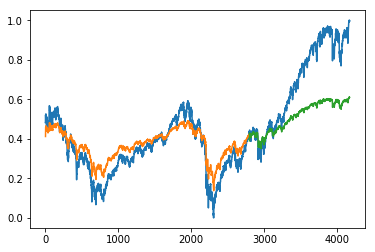

In [20]:
# -------- LSTM model 4 --------  #


# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset


# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))
# create and fit the LSTM network
batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
for i in range(20):
	model.fit(trainX, trainY, epochs=1, batch_size=batch_size, verbose=2, shuffle=False)
	model.reset_states()
# make predictions
trainPredict = model.predict(trainX, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()